In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 데이터 로드 및 전처리
file_path = 'data/USD_KRW.csv'
df = pd.read_csv(file_path)

In [10]:
# 날짜 변환 및 정렬 (과거 -> 현재)
df['날짜'] = pd.to_datetime(df['날짜'])
df = df.sort_values('날짜')
df = df.set_index('날짜')

In [11]:
# 종가 컬럼의 쉼표 제거 및 숫자 변환
df['종가'] = df['종가'].astype(str).str.replace(',', '').astype(float)

In [ ]:
# 12개월 누적 로그 변화율 계산
# 공식: ln(현재 종가) - ln(12개월 전 종가)
df['log_price'] = np.log(df['종가'])
df['12m_log_return'] = df['log_price'].diff(12)  # 12개월(1년) 차분

In [13]:
# Z-Score 계산 (부호 반전 적용)
# 전체 기간의 평균과 표준편차 사용
mean_return = df['12m_log_return'].mean()
std_return = df['12m_log_return'].std()

In [ ]:
# Z-score 계산 후 -1을 곱함
df['z_score'] = -1 * ((df['12m_log_return'] - mean_return) / std_return)

In [ ]:
# CSV 파일 저장
output_filename = 'data/Z_score지수/USD_KRW_z_score.csv'
df.to_csv(output_filename, encoding='utf-8-sig') # 한글 깨짐 방지를 위해 utf-8-sig 사용
print(f"'{output_filename}' 파일이 저장되었습니다.")

'USD_KRW_z_score.csv' 파일이 저장되었습니다.


In [16]:
# 결과 확인
print(df[['종가', '12m_log_return', 'z_score']].tail())

                 종가  12m_log_return   z_score
날짜                                           
2025-10-01  1429.22        0.040437 -0.421381
2025-11-01  1467.62        0.050984 -0.586222
2025-12-01  1440.62       -0.024790  0.598009
2026-01-01  1450.80       -0.004463  0.280332
2026-02-01  1453.95       -0.005385  0.294728


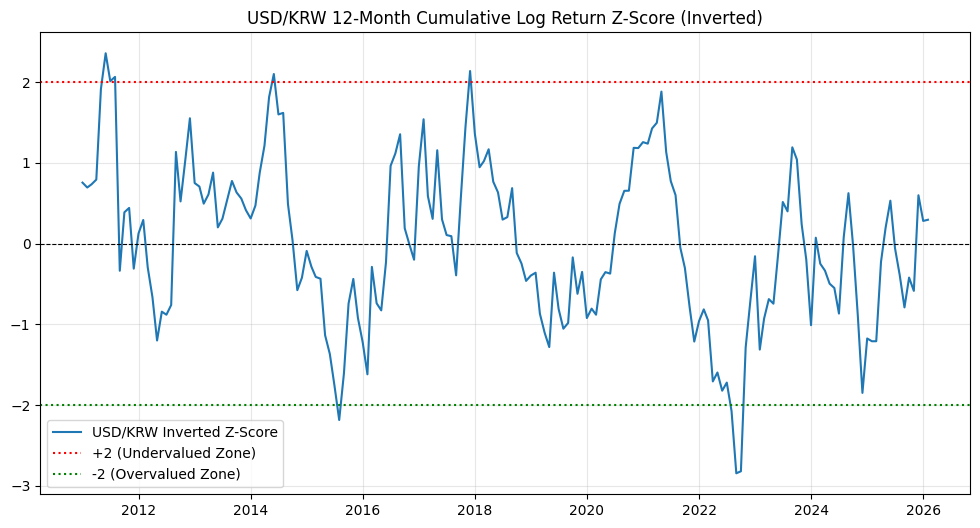

In [17]:
# 5. 시각화
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['z_score'], label='USD/KRW Inverted Z-Score')
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.axhline(2, color='red', linestyle=':', label='+2 (Undervalued Zone)')
plt.axhline(-2, color='green', linestyle=':', label='-2 (Overvalued Zone)')
plt.title('USD/KRW 12-Month Cumulative Log Return Z-Score (Inverted)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()